# Shapeship Titanic Project

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Dataset
## Overview

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


### How many data is missing in %

In [6]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
len(df)

8693

<AxesSubplot:>

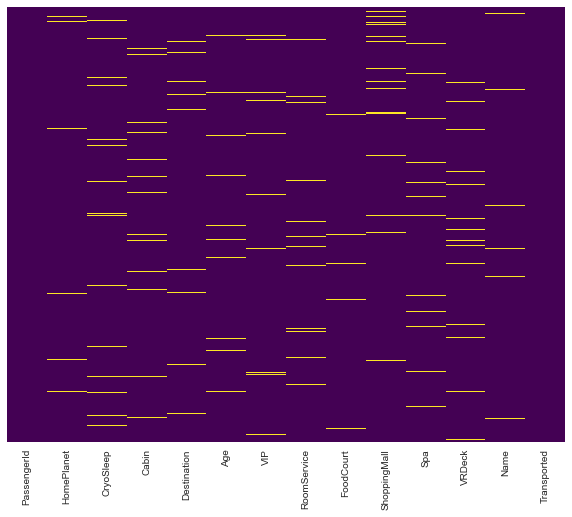

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Missing Data
### Replace numeric values with the mean of the feature

In [9]:
numeric_col = df.select_dtypes(include=['int', 'float64']).columns

In [10]:
numeric_col

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [11]:
for col in numeric_col:
    df[f'{col}'] = df[f'{col}'].replace(to_replace=np.nan, value=df[f'{col}'].mean())

### Replace categorical values with the most frequent values

In [12]:
categorical_col = df.select_dtypes(include=['object']).columns

In [13]:
categorical_col

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [14]:
for col in categorical_col:
    df[f'{col}'] = df[f'{col}'].replace(to_replace=np.nan, value=df[f'{col}'].value_counts().index[0])

In [15]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

<AxesSubplot:>

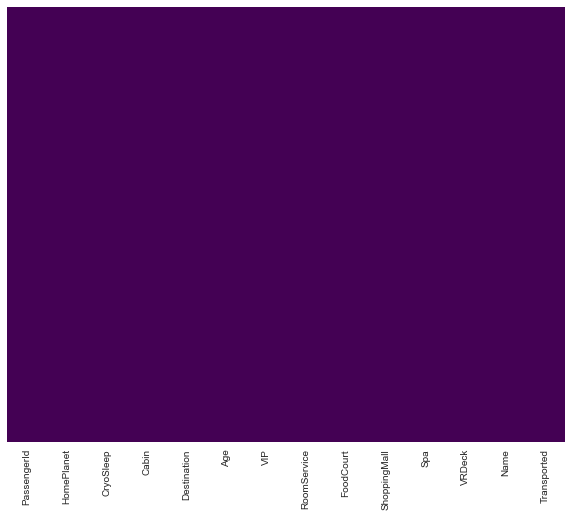

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# EDA (Exploratory Data Analysis)
## HomePlanet

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

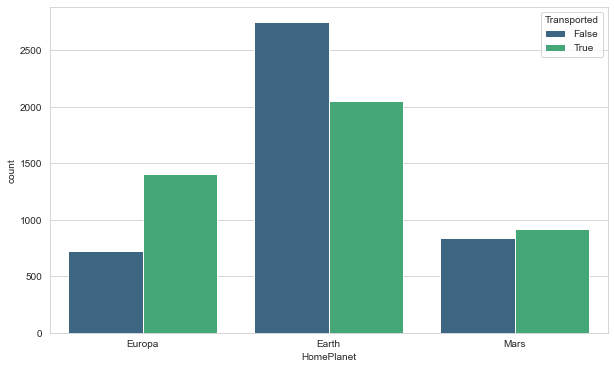

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='HomePlanet', data=df, hue='Transported', palette='viridis')

## CryoSleep

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

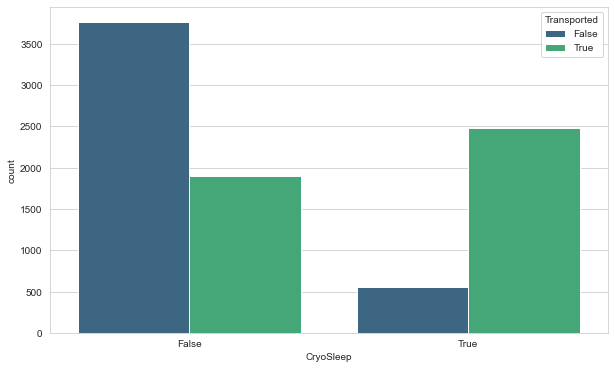

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='CryoSleep', data=df, hue='Transported', palette='viridis')

## Cabin

In [19]:
df['Cabin_deck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
df['Cabin_num'] = df['Cabin'].apply(lambda x: x.split('/')[1])
df['Cabin_side'] = df['Cabin'].apply(lambda x: x.split('/')[2])

In [20]:
df[['Cabin', 'Cabin_deck', 'Cabin_num', 'Cabin_side', 'Transported']]

,Cabin,Cabin_deck,Cabin_num,Cabin_side,Transported
0,B/0/P,B,0,P,False
1,F/0/S,F,0,S,True
2,A/0/S,A,0,S,False
3,A/0/S,A,0,S,False
4,F/1/S,F,1,S,True
...,...,...,...,...,...
8688,A/98/P,A,98,P,False
8689,G/1499/S,G,1499,S,False
8690,G/1500/S,G,1500,S,True
8691,E/608/S,E,608,S,False


<AxesSubplot:xlabel='Cabin_deck', ylabel='count'>

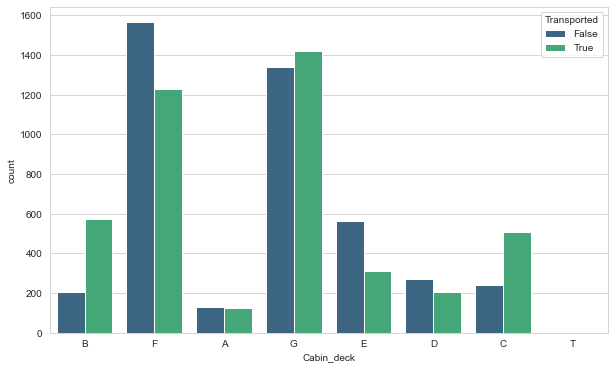

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='Cabin_deck', data=df, hue='Transported', palette='viridis')

<AxesSubplot:xlabel='Cabin_side', ylabel='count'>

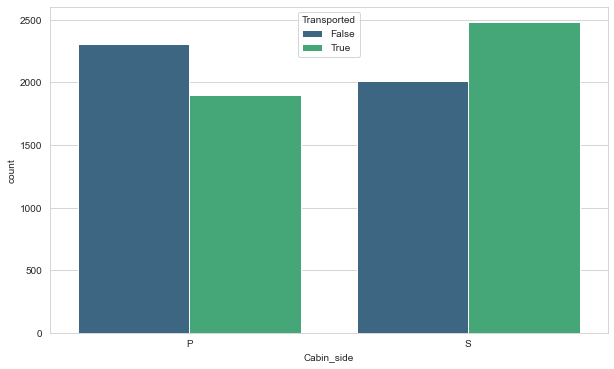

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='Cabin_side', data=df, hue='Transported', palette='viridis')

## Destination

<AxesSubplot:xlabel='Destination', ylabel='count'>

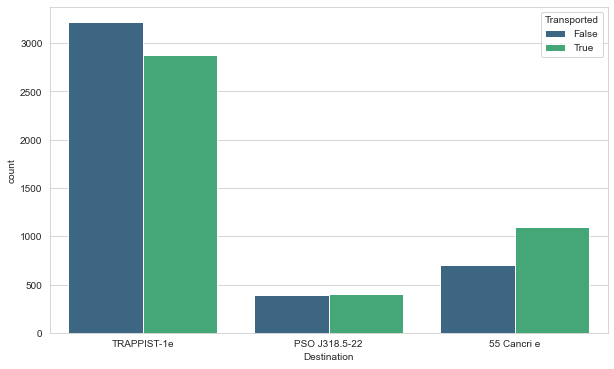

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='Destination', data=df, hue='Transported', palette='viridis')

## Age

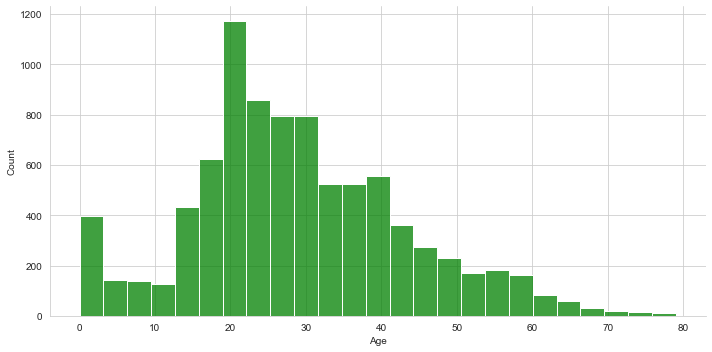

In [24]:
sns.displot(df['Age'], aspect=2, color='green', bins=25)

## VIP

<AxesSubplot:xlabel='VIP', ylabel='count'>

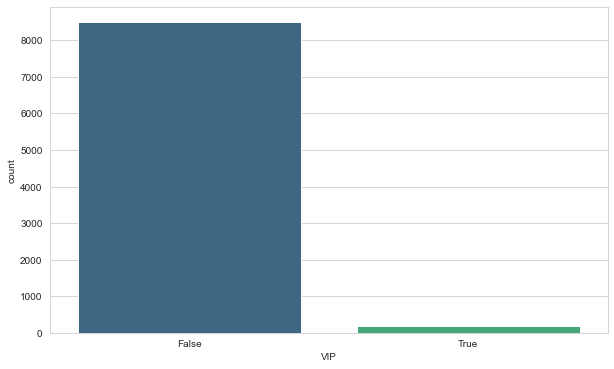

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='VIP', data=df, palette='viridis')

## RoomService, FoodCourt, ShoppingMall, Spa, VRDeck 

In [26]:
df['Total_Bill'] = df.apply(lambda x: sum([x.RoomService, x.FoodCourt, x.ShoppingMall, x.Spa, x.VRDeck]), axis=1)

In [27]:
df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_Bill']].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Bill
0,0.0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0,736.0
2,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,303.0,70.0,151.0,565.0,2.0,1091.0


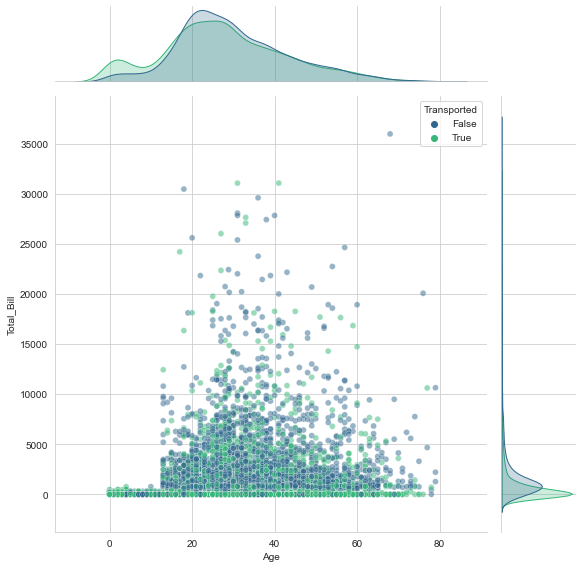

In [28]:
sns.jointplot(x='Age', y='Total_Bill', data=df, height=8, hue='Transported', alpha=0.5, palette='viridis')

# Data Engineering / Preparing

In [29]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,Total_Bill
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0


### PassengerId

In [30]:
df['PassengerId_group'] = df['PassengerId'].apply(lambda x: x.split('_')[0])
df['PassengerId_num'] = df['PassengerId'].apply(lambda x: x.split('_')[1])

### HomePlanet

In [31]:
homeplanet_dummies = pd.get_dummies(df['HomePlanet'], prefix='home', drop_first=True)

In [32]:
df = pd.concat([df,homeplanet_dummies], axis=1)

### CryoSleep

In [33]:
df['CryoSleep'] = df['CryoSleep'].apply(int)

### Cabin

In [34]:
df[['Cabin', 'Cabin_deck', 'Cabin_num', 'Cabin_side']].head()

,Cabin,Cabin_deck,Cabin_num,Cabin_side
0,B/0/P,B,0,P
1,F/0/S,F,0,S
2,A/0/S,A,0,S
3,A/0/S,A,0,S
4,F/1/S,F,1,S


In [35]:
cabindeck_dummies = pd.get_dummies(df['Cabin_deck'], prefix='deck', drop_first=True)
cabinside_dummies = pd.get_dummies(df['Cabin_side'], prefix='side', drop_first=True)

In [36]:
df = pd.concat([df, cabindeck_dummies, cabinside_dummies], axis=1)

### Destination

In [37]:
destination_dummies = pd.get_dummies(df['Destination'], prefix='destination', drop_first=True)

In [38]:
df = pd.concat([df, destination_dummies], axis=1)

### VIP

In [39]:
df['VIP'] = df['VIP'].apply(int)

### Transported

In [40]:
df['Transported'] = df['Transported'].apply(int)

### Drop Repeated Features

In [41]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Cabin_deck', 'Cabin_num', 'Cabin_side',
       'Total_Bill', 'PassengerId_group', 'PassengerId_num', 'home_Europa',
       'home_Mars', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'deck_T', 'side_S', 'destination_PSO J318.5-22',
       'destination_TRAPPIST-1e'],
      dtype='object')

In [42]:
df = df.drop(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 
              'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 
             'VRDeck', 'Name', 'Cabin_deck', 'Cabin_side'], axis=1)

In [43]:
df.columns

Index(['CryoSleep', 'Age', 'VIP', 'Transported', 'Cabin_num', 'Total_Bill',
       'PassengerId_group', 'PassengerId_num', 'home_Europa', 'home_Mars',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T',
       'side_S', 'destination_PSO J318.5-22', 'destination_TRAPPIST-1e'],
      dtype='object')

In [44]:
df.head()

,CryoSleep,Age,VIP,Transported,Cabin_num,Total_Bill,PassengerId_group,PassengerId_num,home_Europa,home_Mars,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,0,39.0,0,0,0,0.0,0001,01,1,0,1,0,0,0,0,0,0,0,0,1
1,0,24.0,0,1,0,736.0,0002,01,0,0,0,0,0,0,1,0,0,1,0,1
2,0,58.0,1,0,0,10383.0,0003,01,1,0,0,0,0,0,0,0,0,1,0,1
3,0,33.0,0,0,0,5176.0,0003,02,1,0,0,0,0,0,0,0,0,1,0,1
4,0,16.0,0,1,1,1091.0,0004,01,0,0,0,0,0,0,1,0,0,1,0,1


# Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop('Transported', axis=1)
y = df['Transported']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101, stratify=y)

# Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(n_estimators=350)

In [50]:
X_train.shape

(6519, 19)

In [51]:
y_train.shape

(6519,)

In [52]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350)

## Predictions and Evaluation

In [53]:
predictions = rfc.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[869 210]
 [330 765]]


              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1079
           1       0.78      0.70      0.74      1095

    accuracy                           0.75      2174
   macro avg       0.75      0.75      0.75      2174
weighted avg       0.75      0.75      0.75      2174



# Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbc = GradientBoostingClassifier()

In [58]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [59]:
pred = gbc.predict(X_test)

In [60]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[882 197]
 [305 790]]


              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1079
           1       0.80      0.72      0.76      1095

    accuracy                           0.77      2174
   macro avg       0.77      0.77      0.77      2174
weighted avg       0.77      0.77      0.77      2174



# Test Dataset Predictions

In [61]:
df = pd.read_csv('train.csv')

In [62]:
df_test = pd.read_csv('test.csv')

In [63]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [64]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## Prepare Dataset for the model

In [65]:
df_test_Id = df_test['PassengerId']

#### Missing Data

In [66]:
for col in numeric_col:
    df_test[f'{col}'] = df_test[f'{col}'].replace(to_replace=np.nan, value=df[f'{col}'].mean())

In [67]:
for col in categorical_col:
    df_test[f'{col}'] = df_test[f'{col}'].replace(to_replace=np.nan, value=df[f'{col}'].value_counts().index[0])

In [68]:
df_test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

#### Data engineering

In [69]:
df_test['PassengerId_group'] = df_test['PassengerId'].apply(lambda x: x.split('_')[0])
df_test['PassengerId_num'] = df_test['PassengerId'].apply(lambda x: x.split('_')[1])

In [70]:
df_test['CryoSleep'] = df_test['CryoSleep'].apply(int)

In [71]:
df_test['Cabin_deck'] = df_test['Cabin'].apply(lambda x: x.split('/')[0])
df_test['Cabin_num'] = df_test['Cabin'].apply(lambda x: x.split('/')[1])
df_test['Cabin_side'] = df_test['Cabin'].apply(lambda x: x.split('/')[2])

In [72]:
df_test['VIP'] = df_test['VIP'].apply(int)

In [73]:
df_test['Total_Bill'] = df_test.apply(lambda x: sum([x.RoomService, 
                                                     x.FoodCourt, x.ShoppingMall, 
                                                     x.Spa, x.VRDeck]), axis=1)

#### Dummy Variables

In [74]:
dummy_home = pd.get_dummies(df_test['HomePlanet'], prefix='home', drop_first=True)
dummy_deck = pd.get_dummies(df_test['Cabin_deck'], prefix='deck', drop_first=True)
dummy_side = pd.get_dummies(df_test['Cabin_side'], prefix='side', drop_first=True)
dummy_dest = pd.get_dummies(df_test['Destination'], prefix='destination', drop_first=True)

In [75]:
df_test = pd.concat([df_test, dummy_home, dummy_deck, dummy_side, dummy_dest], axis=1)

In [76]:
df_test = df_test.drop(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 
              'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 
             'VRDeck', 'Name', 'Cabin_deck', 'Cabin_side'], axis=1)

In [77]:
df_test.head()

,CryoSleep,Age,VIP,PassengerId_group,PassengerId_num,Cabin_num,Total_Bill,home_Europa,home_Mars,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,1,27.0,0,0013,01,3,0.0,0,0,0,0,0,0,0,1,0,1,0,1
1,0,19.0,0,0018,01,4,2832.0,0,0,0,0,0,0,1,0,0,1,0,1
2,1,31.0,0,0019,01,0,0.0,1,0,0,1,0,0,0,0,0,1,0,0
3,0,38.0,0,0021,01,1,7418.0,1,0,0,1,0,0,0,0,0,1,0,1
4,0,20.0,0,0023,01,5,645.0,0,0,0,0,0,0,1,0,0,1,0,1


In [78]:
df_test.columns

Index(['CryoSleep', 'Age', 'VIP', 'PassengerId_group', 'PassengerId_num',
       'Cabin_num', 'Total_Bill', 'home_Europa', 'home_Mars', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T', 'side_S',
       'destination_PSO J318.5-22', 'destination_TRAPPIST-1e'],
      dtype='object')

In [79]:
df_test = df_test[['CryoSleep', 'Age', 'VIP', 'Cabin_num', 'Total_Bill',
       'PassengerId_group', 'PassengerId_num', 'home_Europa', 'home_Mars',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T',
       'side_S', 'destination_PSO J318.5-22', 'destination_TRAPPIST-1e']]

## Make Predictions 

In [80]:
pred = gbc.predict(df_test)

In [81]:
df_test['Transported_num'] = pred

In [82]:
df_test['Transported'] = df_test['Transported_num'].apply(bool)

In [83]:
df_test['Transported'].head()

0    False
1    False
2     True
3    False
4    False
Name: Transported, dtype: bool

In [84]:
df_test.head()

,CryoSleep,Age,VIP,Cabin_num,Total_Bill,PassengerId_group,PassengerId_num,home_Europa,home_Mars,deck_B,...,deck_D,deck_E,deck_F,deck_G,deck_T,side_S,destination_PSO J318.5-22,destination_TRAPPIST-1e,Transported_num,Transported
0,1,27.0,0,3,0.0,0013,01,0,0,0,...,0,0,0,1,0,1,0,1,0,False
1,0,19.0,0,4,2832.0,0018,01,0,0,0,...,0,0,1,0,0,1,0,1,0,False
2,1,31.0,0,0,0.0,0019,01,1,0,0,...,0,0,0,0,0,1,0,0,1,True
3,0,38.0,0,1,7418.0,0021,01,1,0,0,...,0,0,0,0,0,1,0,1,0,False
4,0,20.0,0,5,645.0,0023,01,0,0,0,...,0,0,1,0,0,1,0,1,0,False


In [85]:
df_final = pd.concat([df_test_Id, df_test['Transported']], axis=1)

In [86]:
df_final[['PassengerId', 'Transported']].to_csv('Spacetitanic_pred.csv')

In [87]:
df_final.to_csv('Spacetitanic_pred.csv', index=False)